<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [14]:
# Set your student number
student_number = 99106255
Name = 'Alireza'
Last_Name = 'Shokrani'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [15]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [16]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [17]:
## FILL HERE
train_set = CIFAR10(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = CIFAR10(root='.', train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image_shape = train_set[0][0].shape
input_dim = np.prod(image_shape).item()
num_classes = len(classes)

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


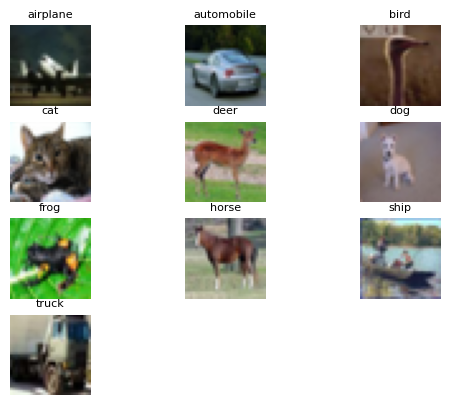

In [18]:
## FILL HERE
seed = np.random.randint(1, len(train_set))
i = 0
while i < num_classes:
    if train_set[seed][1] == i:
        plt.subplot(4, 3, i+1)
        plt.imshow(train_set[seed][0].permute(1, 2, 0))
        plt.axis('off')
        plt.title(classes[i], fontsize = 8)
        i += 1
    seed += 1
    if seed >= len(train_set):
        seed = 0

plt.show()

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [23]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 96, kernel_size=5, device=device)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=1)
        self.conv2 = nn.Conv2d(96, 96, kernel_size=5, device=device)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1)
        self.conv3 = nn.Conv2d(96, 80, kernel_size=5, device=device)
        self.conv4 = nn.Conv2d(80, 64, kernel_size=5, device=device)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=5, device=device)
        self.conv6 = nn.Conv2d(64, 96, kernel_size=5, device=device)
        self.fc1 = nn.Linear(96 * 6 * 6, 256, device=device)
        self.fc2 = nn.Linear(256, num_classes, device=device)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = x.view(-1, 96 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



    
net = Net()


## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [24]:
## FILL HERE
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [25]:
epoch_nums = 40  # Number of epochs
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('Epoch %d, loss: %f' % (epoch + 1, running_loss / len(train_set)))

print('Finished Training')

Epoch 1, loss: 0.036015
Epoch 2, loss: 0.036003
Epoch 3, loss: 0.034336
Epoch 4, loss: 0.029779
Epoch 5, loss: 0.027312
Epoch 6, loss: 0.025442
Epoch 7, loss: 0.023939
Epoch 8, loss: 0.022778
Epoch 9, loss: 0.021633
Epoch 10, loss: 0.020392
Epoch 11, loss: 0.019408
Epoch 12, loss: 0.018680
Epoch 13, loss: 0.017829
Epoch 14, loss: 0.017001
Epoch 15, loss: 0.016333
Epoch 16, loss: 0.015637
Epoch 17, loss: 0.015137
Epoch 18, loss: 0.014709
Epoch 19, loss: 0.014128
Epoch 20, loss: 0.013624
Epoch 21, loss: 0.013179
Epoch 22, loss: 0.012714
Epoch 23, loss: 0.012377
Epoch 24, loss: 0.011970
Epoch 25, loss: 0.011506
Epoch 26, loss: 0.011230
Epoch 27, loss: 0.010852
Epoch 28, loss: 0.010434
Epoch 29, loss: 0.010107
Epoch 30, loss: 0.009807
Epoch 31, loss: 0.009424
Epoch 32, loss: 0.009173
Epoch 33, loss: 0.008848
Epoch 34, loss: 0.008561
Epoch 35, loss: 0.008140
Epoch 36, loss: 0.008015
Epoch 37, loss: 0.007564
Epoch 38, loss: 0.007335
Epoch 39, loss: 0.007096
Epoch 40, loss: 0.006980
Finished 

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [26]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = net(inputs)
        _, preds = torch.max(outputs.data, 1)

        # update totals
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 73 %


Here, we also calculate the model performance for each class as well.

In [27]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = net(inputs)

        # get the predicted class from the outputs
        _, predicted = torch.max(outputs, 1)

        # compare predictions to true label
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 74.7 %
Accuracy for class: automobile is 82.4 %
Accuracy for class: bird  is 58.1 %
Accuracy for class: cat   is 51.8 %
Accuracy for class: deer  is 84.0 %
Accuracy for class: dog   is 60.0 %
Accuracy for class: frog  is 78.8 %
Accuracy for class: horse is 79.4 %
Accuracy for class: ship  is 84.3 %
Accuracy for class: truck is 82.1 %
